Startup commands
===================

Let's start with some boilerplate to import matplotlib and tell it where to plot.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Let's now download some example data.  This is a stinkbug, a hemipteran, from Houston, TX.  Photo by Michael Sarahan, licensed under [Creative Commons Attribution](http://creativecommons.org/licenses/by/4.0/)

In [2]:
import urllib
f = urllib.urlretrieve("http://i.imgur.com/g3TZeEk.png")

And load it in using matplotlib (which uses PIL or Pillow behind the scenes):

In [3]:
from matplotlib import image as mpimg
img=mpimg.imread(f[0])

Take a look.

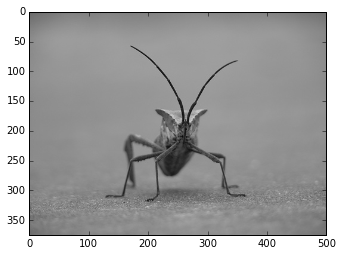

In [4]:
plt.imshow(img)

What does image data look like?

In [5]:
img

array([[[ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        ..., 
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098]],

       [[ 0.41176471,  0.41176471,  0.41176471],
        [ 0.41176471,  0.41176471,  0.41176471],
        [ 0.41176471,  0.41176471,  0.41176471],
        ..., 
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098]],

       [[ 0.41960785,  0.41960785,  0.41960785],
        [ 0.41568628,  0.41568628,  0.41568628],
        [ 0.41568628,  0.41568628,  0.41568628],
        ..., 
        [ 0.43137255,  0.43137255,  0.43137255],
        [ 0.43137255,  0.43137255,  0.43137255],
        [ 0.43137255,  0.43137255,  0.43137255]],

       ..., 
       [[ 0.43921569,  0.43921569,  0.43921569],
        

Wait, I thought this was a black and white image?  Why is it a 3D array?

Each inner list represents a pixel.  Here, with an RGB image, there
are 3 values.  Since it's a black and white image, R, G, and B are all
similar.  An RGBA (where A is alpha, or transparency), has 4 values
per inner list, and a simple luminance image just has one value (and
is thus only a 2-D array, not a 3-D array).  

Note the dtype there - float32.  Matplotlib has rescaled the 8 bit
data from each channel to floating point data between 0.0 and 1.0.  As
a side note, the only datatype that Pillow can work with is uint8.
Matplotlib plotting can handle many data types, but image
reading/writing for any format other than PNG is limited to uint8
data.  Why 8 bits? Most displays can only render 8 bits per channel
worth of color gradation.  Why can they only render 8 bits/channel?
Because that's about all the human eye can see.  More here (from a
photography standpoint): [Luminous Landscape bit depth tutorial](http://www.luminous-landscape.com/tutorials/bit-depth.shtml).

Plotting numpy arrays as images
===============================

So, you have your data in a numpy array (either by importing it, or by
generating it).  Let's render it.  In Matplotlib, this is performed
using the [imshow](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) function.  Here we'll grab
the plot object.  This object gives you an easy way to manipulate the
plot from the prompt.

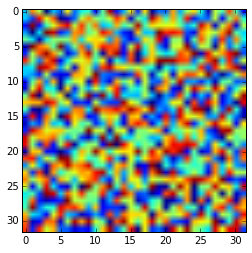

In [6]:
# generate a random array
a=np.random.random((32,32))
# plot it
plt.imshow(a)

Colomaps and Pseudocolor
========================

Pseudocolor can be a useful tool for enhancing contrast and
visualizing your data more easily.  This is especially useful when
making presentations of your data using projectors - their contrast is
typically quite poor.

Colormaps describe what color is assigned to which data value.  A colormap describes the full range of your data.  For example, the "gray" colormap ranges from black to white, across whatever values of data you're plotting.  You can use one of the [many pre-defined colormaps in Matplotlib](http://matplotlib.org/examples/color/colormaps_reference.html), or [define your own](http://matplotlib.org/examples/pylab_examples/custom_cmap.html).

Applying colormaps to images
----------------------------

Pseudocolor is only relevant to single-channel, grayscale, luminosity
images.  We currently have an RGB image.  Since R, G, and B are all
similar (see for yourself above or in your data), we can just pick one
channel of our data:

In [7]:
img_ch = img[:,:,0]

This is array slicing.  You can read more in the [Numpy tutorial](http://www.scipy.org/Tentative_NumPy_Tutorial).

In [8]:
# we now have a 2D array with the intensities from only the first (R) channel of the image
print(img_ch)
print(img_ch.shape)

[[ 0.40784314  0.40784314  0.40784314 ...,  0.42745098  0.42745098
   0.42745098]
 [ 0.41176471  0.41176471  0.41176471 ...,  0.42745098  0.42745098
   0.42745098]
 [ 0.41960785  0.41568628  0.41568628 ...,  0.43137255  0.43137255
   0.43137255]
 ..., 
 [ 0.43921569  0.43529412  0.43137255 ...,  0.45490196  0.4509804
   0.4509804 ]
 [ 0.44313726  0.44313726  0.43921569 ...,  0.4509804   0.44705883
   0.44705883]
 [ 0.44313726  0.4509804   0.4509804  ...,  0.44705883  0.44705883
   0.44313726]]
(375, 500)


When we use imshow on such an array, as we saw before with the random numpy data, rather than a black and white image, we get a colormapped, pseudocolor image.

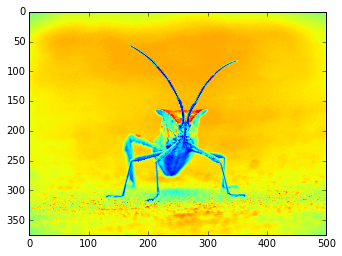

In [9]:
img_plot = plt.imshow(img_ch)

The default colormap (aka lookup table, LUT), is applied.  The default is called jet.  There are plenty of
others to choose from.  You can set them either using the [set_cmap](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.set_cmap) method on our image plot
object, or by setting the cmap argument in imshow:

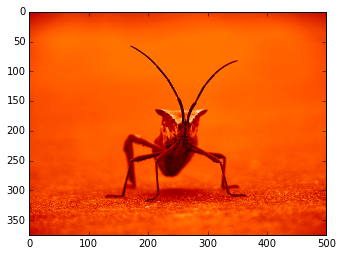

In [10]:
img_plot = plt.imshow(img_ch)
# NOTE: this will not change colormaps of image plots in previous notebook cells - only in this cell!
img_plot.set_cmap("gist_heat")

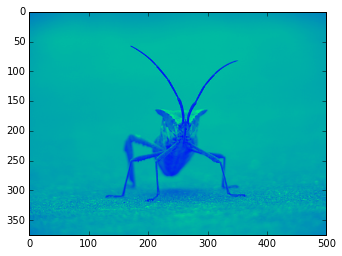

In [11]:
plt.imshow(img_ch, cmap="winter")

The previous two examples passed colormaps by string ID.  You can also pass instances of cm objects.  This would be especially useful if you are defining your own colormaps.

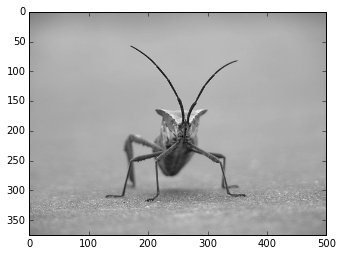

In [12]:
cmap = plt.cm.gray
plt.imshow(img_ch, cmap=cmap)

Color scale reference
=====================

It's helpful to have an idea of what value a color represents.  We can
do that by adding color bars.

<matplotlib.colorbar.Colorbar instance at 0x7f140227c290>

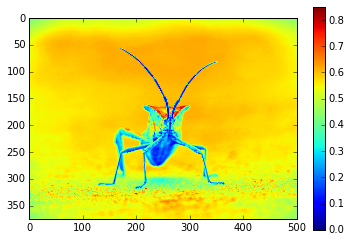

In [13]:
img_plot = plt.imshow(img_ch)
plt.colorbar()

This adds a colorbar to your existing figure.  This won't
automatically change if you change you switch to a different
colormap - you have to re-create your plot, and add in the colorbar
again.  In a notebook, that's not really an issue, but keep this in mind for work you do at an interactive prompt.

That colorbar is not automatically the same size as the plot to which it applies.  There are [several ways to get it to go different places, and be the correct size](http://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html).  Let's see one:

<matplotlib.colorbar.Colorbar instance at 0x7f1402119560>

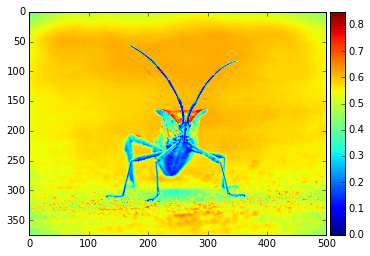

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

ax = plt.gca()
im = ax.imshow(img_ch)

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

Axis calibrations
=================

We live in a physical world.  Images in and of themselves are nice, but what makes them useful to scientists and engineers is what they represent.  Scale bars!

Matplotlib supports calibrations by passing imshow [the "extent" argument]() to imshow.  For example, let's assign some units that let us say how big this bug is.

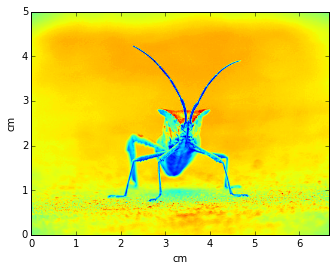

In [15]:
# first, let's say we know the bug is 2 cm tall.  The image has about 150 px representing those 2 cm.
scale = 2.0/150 # cm/pixel
#extent = [lateral_start, lateral_stop, vertical_start, vertical_stop]
extent = [0, img_ch.shape[1]*scale, 0, img_ch.shape[0]*scale]
plt.imshow(img_ch, extent=extent)
plt.xlabel("cm")
plt.ylabel("cm")

To flip an axis, just enter the extent backwards:

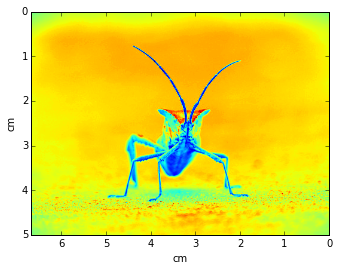

In [16]:
extent = [img_ch.shape[1]*scale, 0, img_ch.shape[0]*scale, 0]
plt.imshow(img_ch, extent=extent)
plt.xlabel("cm")
plt.ylabel("cm")

Aspect Ratio
============

Aspect ratio is the relative size of plots.  You hear about it in the context of TV and movies.  It is the ratio of the width of the plot (or screen) to the height.  4:3 is common, as it is the golden ratio.  16:9 is common now for monitors - the square of the golden ratio.

Aspect ratio for image plots becomes relevant when you know your image plot should be a particular shape, but your data grid isn't necessarily that shape, or you are using calibrated data (extents as shown above) and your axes are not the same units.  There is [a particularly helpful Stack Overflow post by Joe Kington on this](http://stackoverflow.com/questions/13384653/imshow-extent-and-aspect).  Here is his example:

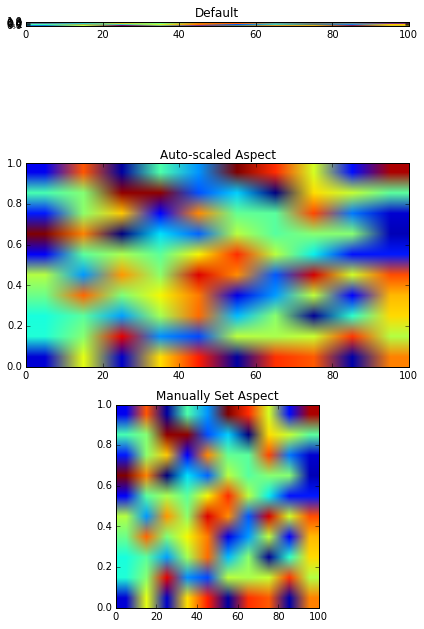

In [17]:
# data is truly 10x10
grid = np.random.random((10,10))

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(6,10))

# Calibration is not 1:1!  This will throw off the plot's aspect ratio.
ax1.imshow(grid, extent=[0,100,0,1])
ax1.set_title('Default')

ax2.imshow(grid, extent=[0,100,0,1], aspect='auto')
ax2.set_title('Auto-scaled Aspect')

# manually enter in our known aspect ratio (width/height)
ax3.imshow(grid, extent=[0,100,0,1], aspect=100)
ax3.set_title('Manually Set Aspect')

plt.tight_layout()
plt.show()

Examining a specific data range
===============================

Sometimes you want to enhance the contrast in your image, or expand
the contrast in a particular region while sacrificing the detail in
colors that don't vary much, or don't matter.  A good tool to find
interesting regions is the histogram.  To create a histogram of our
image data, we use the [hist](http://matplotlib.org/api/pyplot_api.html?highlight=matplotlib.pyplot.hist#matplotlib.pyplot.hist) function.

<a list of 256 Patch objects>

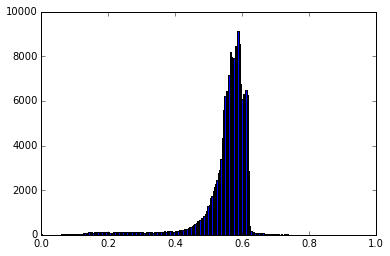

In [18]:
plt.hist(img_ch.flatten(), 256, range=(0,1))[2]

Most often, the "interesting" part of the image is around the peak,
and you can get extra contrast by clipping the regions above and/or
below the peak.  In our histogram, it looks like there's not much
useful information in the high end (not many white things in the
image).  Let's adjust the upper limit, so that we effectively "zoom in
on" part of the histogram.  We do this by setting the clim argument in imshow.  You could also call the
[set_clim]() method of the image plot
object, but remember to do that in the same cell as creating the plot!

<matplotlib.colorbar.Colorbar instance at 0x7f1401497248>

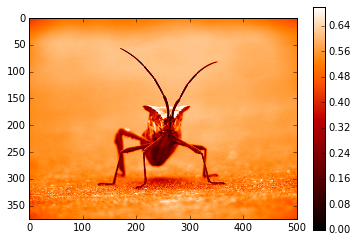

In [19]:
imgplot = plt.imshow(img_ch, clim=(0,0.7), cmap="gist_heat")
plt.colorbar()

To show this side by side with the original, let's do a subplot example:

<matplotlib.colorbar.Colorbar instance at 0x7f14011f79e0>

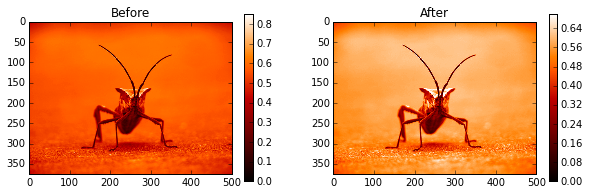

In [20]:
fig = plt.figure(figsize=(10,3))
a = fig.add_subplot(1, 2, 1)
plt.imshow(img_ch, cmap="gist_heat")
plt.title("Before")
plt.colorbar()
b = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img_ch, cmap="gist_heat")
# alternative to passing clim arg:
imgplot.set_clim((0, 0.7))
plt.title("After")
plt.colorbar()

Array Interpolation schemes
===========================

Interpolation calculates what the color or value of a pixel "should"
be, according to different mathematical schemes.  One common place
that this happens is when you resize an image.  The number of pixels
change, but you want the same information.  Since pixels are discrete,
there's missing space.  Interpolation is how you fill that space.
This is why your images sometimes come out looking pixelated when you
blow them up.  The effect is more pronounced when the difference
between the original image and the expanded image is greater.  Let's
take our image and shrink it.  We're effectively discarding pixels,
only keeping a select few.  Now when we plot it, that data gets blown
up to the size on your screen.  The old pixels aren't there anymore,
and the computer has to draw in pixels to fill that space.

In [21]:
# first, resize our image to a much smaller image, so that we lose lots of pixels.
# Note that interpolation occurs both when upsampling and when downsampling data!
# On the way down, we'll use nearest neighbor interpolation (order=0)
import scipy.ndimage
resized = scipy.ndimage.zoom(img_ch, 0.1, order=0)

/home/msarahan/anaconda/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


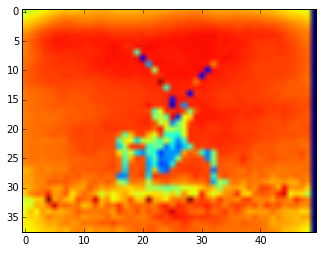

In [22]:
plt.imshow(resized)

Here we have the default interpolation for plotting, bilinear, since we did not
give [imshow](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) any interpolation argument.

Let's try some others:

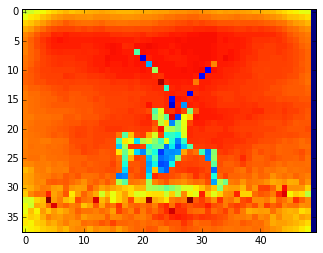

In [23]:
plt.imshow(resized, interpolation="nearest")

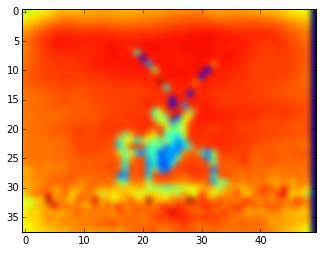

In [24]:
plt.imshow(resized, interpolation="bicubic")

Bicubic interpolation is often used when blowing up photos - people
tend to prefer blurry over pixelated.